In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fault_data = pd.read_csv(Path('./archive/classData.csv'))

In [4]:
fault_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [5]:
fault_data[3027:3028][:]

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
3027,0,1,1,0,12.999057,525.297463,-535.688226,0.459723,0.029303,-0.489026


In [6]:
cols = ["G", "C", "B", "A"]

def clf(g:int, c:int, b:int, a:int):
    if (g == 0) and (c == 0) and (b == 0) and (a == 0):
        return 0
    elif (g == 1) and (c == 0) and (b == 0) and (a == 1):
        return 1
    elif (g == 0) and (c == 1) and (b == 1) and (a == 0):
        return 2
    elif (g == 1) and (c == 0) and (b == 1) and (a == 1):
        return 3
    elif (g == 0) and (c == 1) and (b == 1) and (a == 1):
        return 4
    elif (g == 1) and (c == 1) and (b == 1) and (a == 1):
        return 5
    else:
        return 'unk'

In [7]:
clf(0,0,1,0)

'unk'

In [8]:
fault_data["Label"] = fault_data[cols].apply(lambda x: clf(x[0], x[1], x[2], x[3]), axis=1)

/var/folders/kp/1d1hp3nx67n6k3_0ll82scq40000gn/T/ipykernel_85898/3545821980.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fault_data["Label"] = fault_data[cols].apply(lambda x: clf(x[0], x[1], x[2], x[3]), axis=1)


In [9]:
fault_data[2000:2005][:]

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Label
2000,1,0,1,1,-748.394242,-1.875735,-40.297364,-0.036098,0.373039,-0.336941,3
2001,1,0,1,1,-741.295517,-15.853411,-40.942865,-0.036442,0.373798,-0.337357,3
2002,1,0,1,1,-734.013883,-29.827182,-41.578264,-0.036776,0.374465,-0.337689,3
2003,1,0,1,1,-726.551138,-43.793601,-42.203405,-0.037102,0.375040,-0.337938,3
2004,1,0,1,1,-718.909122,-57.749221,-42.818132,-0.037418,0.375522,-0.338103,3


In [10]:
fault_data[200:205][:]

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Label
200,1,0,0,1,740.514773,69.830600,-25.647254,-0.254792,0.132935,0.121857,1
201,1,0,0,1,747.830491,69.640268,-24.972132,-0.250282,0.123633,0.126649,1
202,1,0,0,1,754.962001,69.431836,-24.291765,-0.245711,0.114301,0.131410,1
203,1,0,0,1,761.909464,69.206874,-23.604802,-0.241080,0.104940,0.136140,1
204,1,0,0,1,768.673452,68.966245,-22.910608,-0.236390,0.095554,0.140836,1


In [11]:
fault_data = fault_data.drop(cols, axis=1)

In [12]:
fault_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ia      7861 non-null   float64
 1   Ib      7861 non-null   float64
 2   Ic      7861 non-null   float64
 3   Va      7861 non-null   float64
 4   Vb      7861 non-null   float64
 5   Vc      7861 non-null   float64
 6   Label   7861 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 430.0 KB


In [13]:
fault_data.describe()

,Ia,Ib,Ic,Va,Vb,Vc,Label
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515,2.110164
std,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897,1.826041
min,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709,0.000000
25%,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977,0.000000
50%,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281,2.000000
75%,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973,4.000000
max,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179,5.000000


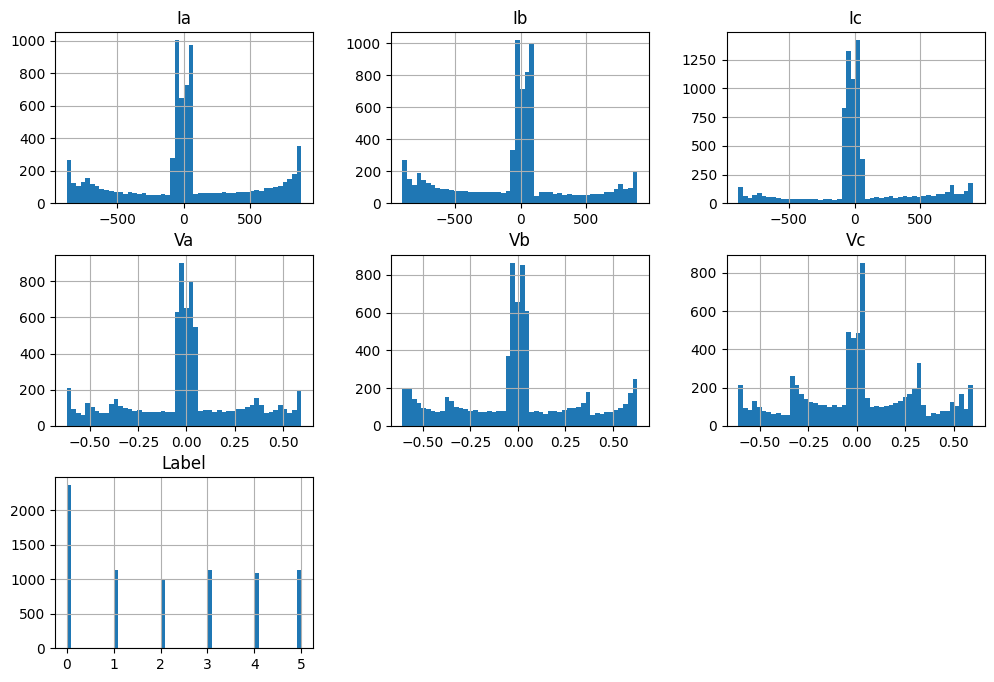

In [14]:
fault_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [15]:
label = fault_data["Label"]
fault_data = fault_data.drop(['Label'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fault_data,label,
                                       test_size=0.2,
                                       random_state=42)

In [17]:
len(X_train), len(X_test)

(6288, 1573)

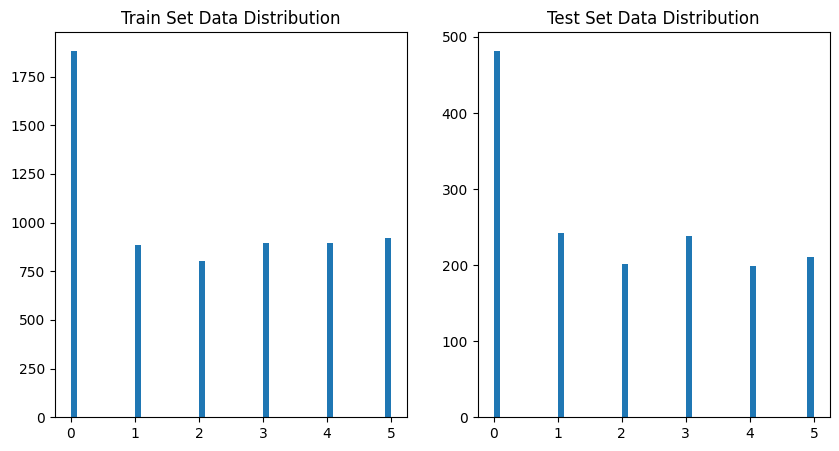

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50)
plt.title("Train Set Data Distribution")
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=50)
plt.title("Test Set Data Distribution")
plt.show()

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler())
x_train_scaled = pipeline.fit_transform(X_train)
x_test_scaled = pipeline.fit_transform(X_test)


RANDOM FOREST CLASSIFIER

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 600, random_state=42)

clf.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=600, random_state=42)

In [21]:
import time
initial = time.time()
clf.predict(x_test_scaled[[0]])
final = time.time()
print((final - initial)*1000)

19.3479061126709


In [22]:
clf.score(x_test_scaled, y_test)

0.8671328671328671

In [23]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# full_pipeline =Pipeline([('random_forest', RandomForestClassifier(random_state=42)),])
# param_grid = [{'random_forest__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}]

# grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
# grid_search.fit(x_train_scaled, y_train)

In [24]:
# grid_search.best_params_

f1_score

In [25]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train_scaled, y_train, cv=3)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1882,    0,    0,    0,    0,    1],
       [   0,  887,    0,    0,    0,    0],
       [   0,    0,  803,    0,    0,    0],
       [   0,    6,    0,  890,    0,    0],
       [   0,    1,    0,    0,  454,  442],
       [   0,    0,    0,    7,  441,  474]])

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_pred, y_train, average='micro')

0.8571882951653944

conf_mat

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_score(clf, x_train_scaled, y_train, cv = 3, scoring="accuracy")

array([0.86020992, 0.85830153, 0.85305344])

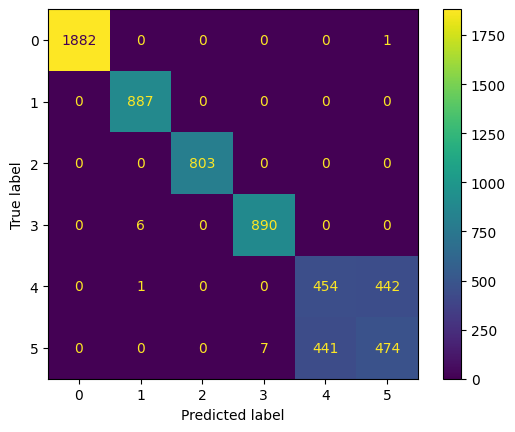

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(clf, x_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

VOTING CLASSIFIER

In [30]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

voting_clf.fit(x_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [31]:
voting_clf.score(x_test_scaled, y_test)

0.7857596948506039

In [32]:
import time
initial = time.time()
voting_clf.predict(x_test_scaled[[0]])
final = time.time()
print((final - initial)*1000)

4.026651382446289


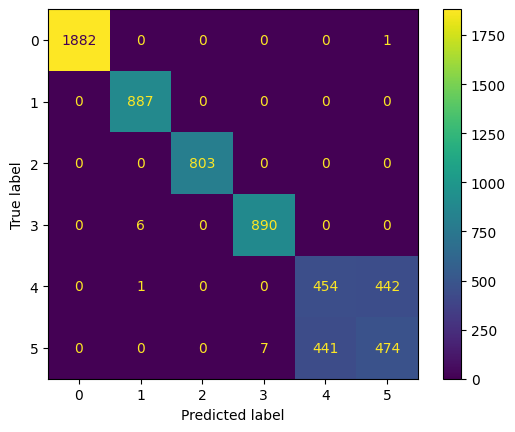

In [33]:
y_train_pred = cross_val_predict(clf, x_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

Feature Importance

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(fault_data, label)

RandomForestClassifier(n_estimators=500, random_state=42)

In [35]:
for score, name in zip(rnd_clf.feature_importances_, fault_data.columns):
    print(round(score, 2), name)

0.21 Ia
0.2 Ib
0.21 Ic
0.14 Va
0.12 Vb
0.12 Vc


ADA Boost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42
)
ada_clf.fit(x_train_scaled, y_train)

/opt/anaconda3/envs/neptune/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [37]:
ada_clf.score(x_test_scaled, y_test)

0.71900826446281

In [38]:
import time
initial = time.time()
ada_clf.predict(x_test_scaled[[0]])
final = time.time()
print((final - initial)*1000)

3.366231918334961


KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1,)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_jobs=-1)

In [40]:
import time
initial = time.time()
knn.predict(x_test_scaled[[0]])
final = time.time()
print((final - initial)*1000)

43.53070259094238


In [41]:
knn.score(x_test_scaled, y_test)

0.8308963763509218

In [42]:
y_train_pred = cross_val_predict(knn, x_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_test, y_train_pred)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1573, 6288]

In [199]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)

GaussianNB()

In [200]:
gnb.score(x_test_scaled, y_test)

0.9109980928162746

In [201]:
import time
initial = time.time()
gnb.predict(x_test_scaled[[0]])
final = time.time()
print((final - initial)*1000)

0.3361701965332031


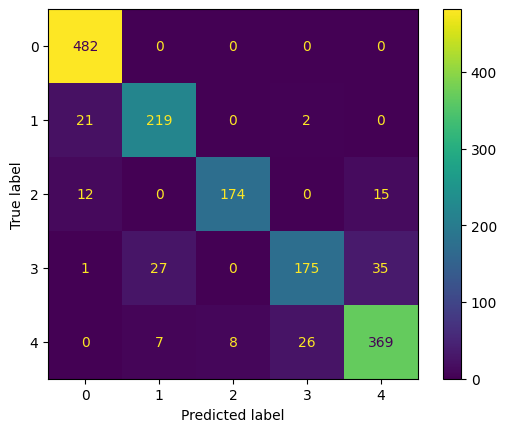

In [202]:
y_test_pred = cross_val_predict(gnb, x_test_scaled, y_test, cv=3)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [203]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(x_train_scaled, y_train)

HistGradientBoostingClassifier()

In [204]:
model.score(x_test_scaled, y_test)


0.9790209790209791

In [205]:
import time
initial = time.time()
model.predict(x_test_scaled[[0]])
final = time.time()
print((final - initial)*1000)


52.32405662536621


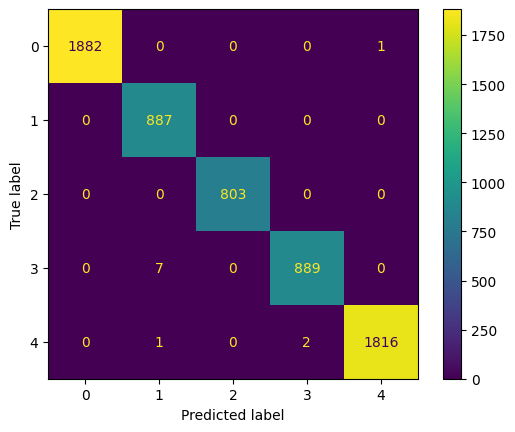

In [206]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt

y_train_pred = cross_val_predict(model, x_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()